In [164]:
from IPython.display import HTML

In [165]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Identify Fraud From Enron Email
### Project Overview
#### Goal
Using machine learning skills to build an algorithm to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

In [60]:
import sys
import pickle
import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tester
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [2]:
%matplotlib inline

In [182]:
#Load the disctionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

#### Dataset review

In [183]:
def exploration_data(data_dict):
    total_people = len(data_dict)
    print "total number of people in the dataset: ", total_people
    
    number_features = len(data_dict["ALLEN PHILLIP K"])
    total_features = data_dict["ALLEN PHILLIP K"].keys()
    print "Total features in the dataset: "
    print total_features
    print "poi is the label, the number of all other featuers in the dataset is: ", number_features-1
    print "An example entry 'ALLEN PHILLIP K' in the dataset: "
    print data_dict["ALLEN PHILLIP K"]
    
    #check for the poi
    total_poi = 0
    for k in data_dict:
        if data_dict[k]["poi"] == True:
            total_poi+=1
    print "The number of poi:", total_poi
    print "The percentage of poi is {:0.2f}%.".format(100.00*total_poi/total_people)
    
exploration_data(data_dict)

total number of people in the dataset:  146
Total features in the dataset: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
poi is the label, the number of all other featuers in the dataset is:  20
An example entry 'ALLEN PHILLIP K' in the dataset: 
{'salary': 201955, 'to_messages': 2902, 'deferral_payments': 2869717, 'total_payments': 4484442, 'exercised_stock_options': 1729541, 'bonus': 4175000, 'restricted_stock': 126027, 'shared_receipt_with_poi': 1407, 'restricted_stock_deferred': -126027, 'total_stock_value': 1729541, 'expenses': 13868, 'loan_advances': 'NaN', 'from_messages': 2195, 'other': 152, 'from_this_person_to_poi': 65, 'poi': False, 'di

#### Outliers
After visualizating the "Salary" and "Bonus", one huge number popped out. Checked the keys of the dataset, I found one key "Total" with big number of "salary" and "bonus", is the sum of all other person.This is an outlier.

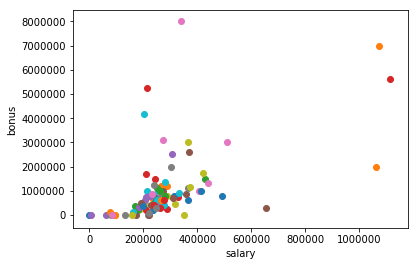

In [181]:
#check for outliers in dataset and remove these outliers
def plot_data(data_dict,f1,f2):
    features = [f1,f2]
    data = featureFormat(data_dict,features)
    
    #data visulization
    for point in data:
        arr1 = point[0]
        arr2 = point[1]
        plt.scatter(arr1,arr2)
    
    plt.xlabel(f1)
    plt.ylabel(f2)
    
    plt.show()
       
plot_data(data_dict,"salary","bonus")

In [6]:
#Check the keys and the outlier could be the total key
#Total is the sum of all salary and bonus
#pop will change the dictonary
data_dict.pop("TOTAL",0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

Plot the dataset after outlier removal, although there are four other big numbers in the plot, there is no extreme plot left.

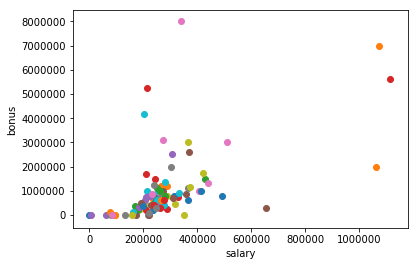

In [7]:
#check the dataset after outlier removal
plot_data(data_dict,"salary","bonus")

In [8]:
#explore other keys
keys = []
for k in data_dict:
    keys.append(k)

pprint.pprint(sorted(keys))


['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

Easily find "THE TRAVEL AGENCY IN THE PARK" is not a name

In [9]:
#remove outlier
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [10]:
#check the dataset after outliers removal
exploration_data(data_dict)

total number of people in the dataset:  144
Total features in the dataset: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
poi is the label, the number of all other featuers in the dataset is:  20
An example entry 'ALLEN PHILLIP K' in the dataset: 
{'salary': 201955, 'to_messages': 2902, 'deferral_payments': 2869717, 'total_payments': 4484442, 'exercised_stock_options': 1729541, 'bonus': 4175000, 'restricted_stock': 126027, 'shared_receipt_with_poi': 1407, 'restricted_stock_deferred': -126027, 'total_stock_value': 1729541, 'expenses': 13868, 'loan_advances': 'NaN', 'from_messages': 2195, 'other': 152, 'from_this_person_to_poi': 65, 'poi': False, 'di

In [11]:
#feature engineering
#remove feature "email_address"
#create new features "from_poi_to_this_person_ratio" and "from_this_person_to_poi_Ratio"
for f in data_dict:
    if data_dict[f]["from_poi_to_this_person"]!="NaN":
        data_dict[f]["from_poi_to_this_person_ratio"] = 1.0 * data_dict[f]["from_poi_to_this_person"]/data_dict[f]["to_messages"]
    else:
        data_dict[f]["from_poi_to_this_person_ratio"] = "NaN"
        
for f in data_dict:
    if data_dict[f]["from_this_person_to_poi"]!="NaN":
        data_dict[f]["from_this_person_to_poi_ratio"] = 1.0 * data_dict[f]["from_this_person_to_poi"]/data_dict[f]["from_messages"]
    else:
        data_dict[f]["from_this_person_to_poi_ratio"] = "NaN"   
        

In [12]:
#make the featurs_list
features_list  = ['poi','total_payments','total_stock_value',
                  'salary', 'deferral_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 
                  'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 
                  'director_fees','to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 
                  'shared_receipt_with_poi','from_poi_to_this_person_ratio','from_this_person_to_poi_ratio']

In [13]:
data_array = featureFormat(data_dict,features_list)
labels, features = targetFeatureSplit(data_array)

In [14]:
#split the data into training and testing
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedShuffleSplit
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features,labels, test_size = 0.3, random_state = 42)

In [15]:
#feature scaling before selection
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rescaled_features_train = scaler.fit_transform(features_train)
rescaled_features_test = scaler.fit_transform(features_test)

In [19]:
#feature selection using SelectKBest, according to the k highest scores
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline,FeatureUnion

In [21]:
#Check the original features
selection = SelectKBest(k=1)

#This dataset is way too high-dementional.Better try PCA
pca = PCA(n_components=2)

#Build estimator from PCA and Univariate selection
combined_features = FeatureUnion([("pca", pca),("univ_select",selection)])
features_transformed = selection.fit(rescaled_features_train,labels_train).transform(rescaled_features_train)

svm = SVC(kernel="linear")

pipeline = Pipeline([("features",combined_features),("svm",svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3, 4],
                  features__univ_select__k=[1, 2, 4, 6],
                 svm__C=[1,10,1e2,1e3])

grid_search = GridSearchCV(pipeline,param_grid=param_grid,cv=5, verbose=10)
grid_search.fit(rescaled_features_train,labels_train) #use training set
print(grid_search.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.857143, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.900000, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.900000, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.900000, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.894737, total=   0.0s
[CV] features__pca__n_components=1, svm__C=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=100.0, features__univ_select__k=1, score=0.900000, total=   0.0s
[CV] features__pca__n_components=1, svm__C=100.0, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=100.0, features__univ_select__k=1, score=0.894737, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1000.0, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1000.0, features__univ_select__k=1, score=0.857143, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1000.0, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1000.0, features__univ_select__k=1, score=0.900000, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1000.0, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1000.0, features__univ_select__k=1, score=0.900000, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1000.0, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1000.0, featur

[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=6, score=0.857143, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=6 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=6, score=0.900000, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=6 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=6, score=0.900000, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=6 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=6, score=0.900000, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=6 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=6, score=0.894737, total=   0.0s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=6 
[CV]  features__pca__n_components=1, svm__C=10, features__univ_select__k=6, score=0.857143, total=   0.0

[CV]  features__pca__n_components=2, svm__C=10, features__univ_select__k=2, score=0.894737, total=   0.0s
[CV] features__pca__n_components=2, svm__C=100.0, features__univ_select__k=2 
[CV]  features__pca__n_components=2, svm__C=100.0, features__univ_select__k=2, score=0.857143, total=   0.0s
[CV] features__pca__n_components=2, svm__C=100.0, features__univ_select__k=2 
[CV]  features__pca__n_components=2, svm__C=100.0, features__univ_select__k=2, score=0.900000, total=   0.0s
[CV] features__pca__n_components=2, svm__C=100.0, features__univ_select__k=2 
[CV]  features__pca__n_components=2, svm__C=100.0, features__univ_select__k=2, score=0.900000, total=   0.0s
[CV] features__pca__n_components=2, svm__C=100.0, features__univ_select__k=2 
[CV]  features__pca__n_components=2, svm__C=100.0, features__univ_select__k=2, score=0.950000, total=   0.0s
[CV] features__pca__n_components=2, svm__C=100.0, features__univ_select__k=2 
[CV]  features__pca__n_components=2, svm__C=100.0, features__univ_se

[CV]  features__pca__n_components=2, svm__C=1000.0, features__univ_select__k=6, score=0.857143, total=   0.0s
[CV] features__pca__n_components=2, svm__C=1000.0, features__univ_select__k=6 
[CV]  features__pca__n_components=2, svm__C=1000.0, features__univ_select__k=6, score=0.800000, total=   0.0s
[CV] features__pca__n_components=2, svm__C=1000.0, features__univ_select__k=6 
[CV]  features__pca__n_components=2, svm__C=1000.0, features__univ_select__k=6, score=0.850000, total=   0.0s
[CV] features__pca__n_components=2, svm__C=1000.0, features__univ_select__k=6 
[CV]  features__pca__n_components=2, svm__C=1000.0, features__univ_select__k=6, score=0.900000, total=   0.0s
[CV] features__pca__n_components=2, svm__C=1000.0, features__univ_select__k=6 
[CV]  features__pca__n_components=2, svm__C=1000.0, features__univ_select__k=6, score=0.894737, total=   0.0s
[CV] features__pca__n_components=3, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=3, svm__C=1, features__uni

[CV]  features__pca__n_components=3, svm__C=1, features__univ_select__k=4, score=0.900000, total=   0.0s
[CV] features__pca__n_components=3, svm__C=1, features__univ_select__k=4 
[CV]  features__pca__n_components=3, svm__C=1, features__univ_select__k=4, score=0.900000, total=   0.0s
[CV] features__pca__n_components=3, svm__C=1, features__univ_select__k=4 
[CV]  features__pca__n_components=3, svm__C=1, features__univ_select__k=4, score=0.894737, total=   0.0s
[CV] features__pca__n_components=3, svm__C=10, features__univ_select__k=4 
[CV]  features__pca__n_components=3, svm__C=10, features__univ_select__k=4, score=0.857143, total=   0.0s
[CV] features__pca__n_components=3, svm__C=10, features__univ_select__k=4 
[CV]  features__pca__n_components=3, svm__C=10, features__univ_select__k=4, score=0.900000, total=   0.0s
[CV] features__pca__n_components=3, svm__C=10, features__univ_select__k=4 
[CV]  features__pca__n_components=3, svm__C=10, features__univ_select__k=4, score=0.900000, total=  

[CV] features__pca__n_components=4, svm__C=100.0, features__univ_select__k=1 
[CV]  features__pca__n_components=4, svm__C=100.0, features__univ_select__k=1, score=0.857143, total=   0.0s
[CV] features__pca__n_components=4, svm__C=100.0, features__univ_select__k=1 
[CV]  features__pca__n_components=4, svm__C=100.0, features__univ_select__k=1, score=0.900000, total=   0.0s
[CV] features__pca__n_components=4, svm__C=100.0, features__univ_select__k=1 
[CV]  features__pca__n_components=4, svm__C=100.0, features__univ_select__k=1, score=0.900000, total=   0.0s
[CV] features__pca__n_components=4, svm__C=100.0, features__univ_select__k=1 
[CV]  features__pca__n_components=4, svm__C=100.0, features__univ_select__k=1, score=0.900000, total=   0.0s
[CV] features__pca__n_components=4, svm__C=100.0, features__univ_select__k=1 
[CV]  features__pca__n_components=4, svm__C=100.0, features__univ_select__k=1, score=0.894737, total=   0.0s
[CV] features__pca__n_components=4, svm__C=1000.0, features__univ

[CV] features__pca__n_components=4, svm__C=1000.0, features__univ_select__k=4 
[CV]  features__pca__n_components=4, svm__C=1000.0, features__univ_select__k=4, score=0.857143, total=   0.0s
[CV] features__pca__n_components=4, svm__C=1000.0, features__univ_select__k=4 
[CV]  features__pca__n_components=4, svm__C=1000.0, features__univ_select__k=4, score=0.900000, total=   0.0s
[CV] features__pca__n_components=4, svm__C=1000.0, features__univ_select__k=4 
[CV]  features__pca__n_components=4, svm__C=1000.0, features__univ_select__k=4, score=0.900000, total=   0.0s
[CV] features__pca__n_components=4, svm__C=1000.0, features__univ_select__k=4 
[CV]  features__pca__n_components=4, svm__C=1000.0, features__univ_select__k=4, score=0.900000, total=   0.0s
[CV] features__pca__n_components=4, svm__C=1000.0, features__univ_select__k=4 
[CV]  features__pca__n_components=4, svm__C=1000.0, features__univ_select__k=4, score=0.894737, total=   0.0s
[CV] features__pca__n_components=4, svm__C=1, features_

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    4.4s finished


In [28]:
print grid_search.best_score_

0.9


In [27]:
#Kbest score
selector2 = SelectKBest()
selector2.fit(rescaled_features_train,labels_train)
scores = selector2.scores_
print scores

[  0.01577282  11.35888511   3.37957149   0.80177991   0.17035996
   0.60516016   0.09039443   3.27499666   3.97539082  11.98850393
   0.06789525   0.9382936    0.88840837   1.80933729   0.22858575
   0.24776177   0.75034312   0.40121725   0.19307721   1.73412511
   9.40083354]


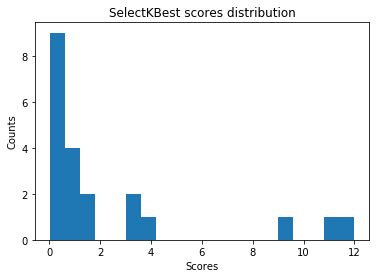

In [29]:
#plot kbest score
plt.hist(scores,bins = 20)
plt.title("SelectKBest scores distribution")
plt.xlabel("Scores")
plt.ylabel("Counts")
plt.show()

In [136]:
###df

df = pd.DataFrame.from_dict(data_dict,orient="index")
df = df.replace("NaN",np.nan)
df = df[features_list]
print df.shape
df.head()

(144, 22)


,poi,total_payments,total_stock_value,salary,deferral_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,expenses,...,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio
ALLEN PHILLIP K,False,4484442.0,1729541.0,201955.0,2869717.0,NaN,4175000.0,-126027.0,-3081055.0,13868.0,...,304805.0,126027.0,NaN,2902.0,47.0,2195.0,65.0,1407.0,0.016196,0.029613
BADUM JAMES P,False,182466.0,257817.0,NaN,178980.0,NaN,NaN,NaN,NaN,3486.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,False,916197.0,5243487.0,477.0,NaN,NaN,NaN,-560222.0,-5104.0,56301.0,...,NaN,1757552.0,NaN,566.0,39.0,29.0,0.0,465.0,0.068905,0.000000
BAXTER JOHN C,False,5634343.0,10623258.0,267102.0,1295738.0,NaN,1200000.0,NaN,-1386055.0,11200.0,...,1586055.0,3942714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,False,827696.0,63014.0,239671.0,260455.0,NaN,400000.0,-82782.0,-201641.0,129142.0,...,NaN,145796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#impute missing values
df.isnull().sum()

poi                                0
total_payments                    21
total_stock_value                 19
salary                            50
deferral_payments                106
loan_advances                    141
bonus                             63
restricted_stock_deferred        127
deferred_income                   96
expenses                          50
exercised_stock_options           43
other                             53
long_term_incentive               79
restricted_stock                  35
director_fees                    128
to_messages                       58
from_poi_to_this_person           58
from_messages                     58
from_this_person_to_poi           58
shared_receipt_with_poi           58
from_poi_to_this_person_ratio     58
from_this_person_to_poi_ratio     58
dtype: int64

In [137]:
#impute null financial features by 0
df.loc[:,"total_payments":"director_fees"] = df.loc[:,"total_payments":"director_fees"].fillna(0)

#impute null contact features by the mean
df.loc[:,"to_messages":"from_this_person_to_poi_ratio"] = df.loc[:,"to_messages":"from_this_person_to_poi_ratio"].apply(lambda x: x.fillna(x.mean()),axis = 0)

#df.loc[:,"to_messages":"from_this_person_to_poi_ratio"] = df.loc[:,"to_messages":"from_this_person_to_poi_ratio"].fillna(0)

In [138]:
#Check to see all null values are corrected
df.isnull().sum()

poi                              0
total_payments                   0
total_stock_value                0
salary                           0
deferral_payments                0
loan_advances                    0
bonus                            0
restricted_stock_deferred        0
deferred_income                  0
expenses                         0
exercised_stock_options          0
other                            0
long_term_incentive              0
restricted_stock                 0
director_fees                    0
to_messages                      0
from_poi_to_this_person          0
from_messages                    0
from_this_person_to_poi          0
shared_receipt_with_poi          0
from_poi_to_this_person_ratio    0
from_this_person_to_poi_ratio    0
dtype: int64

In [144]:
df.head()

,poi,total_payments,total_stock_value,salary,deferral_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,expenses,...,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio
ALLEN PHILLIP K,False,4484442.0,1729541.0,201955.0,2869717.0,0.0,4175000.0,-126027.0,-3081055.0,13868.0,...,304805.0,126027.0,0.0,2902.000000,47.000000,2195.000000,65.000000,1407.000000,0.016196,0.029613
BADUM JAMES P,False,182466.0,257817.0,0.0,178980.0,0.0,0.0,0.0,0.0,3486.0,...,0.0,0.0,0.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055
BANNANTINE JAMES M,False,916197.0,5243487.0,477.0,0.0,0.0,0.0,-560222.0,-5104.0,56301.0,...,0.0,1757552.0,0.0,566.000000,39.000000,29.000000,0.000000,465.000000,0.068905,0.000000
BAXTER JOHN C,False,5634343.0,10623258.0,267102.0,1295738.0,0.0,1200000.0,0.0,-1386055.0,11200.0,...,1586055.0,3942714.0,0.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055
BAY FRANKLIN R,False,827696.0,63014.0,239671.0,260455.0,0.0,400000.0,-82782.0,-201641.0,129142.0,...,0.0,145796.0,0.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055


In [139]:
my_dataset = df.to_dict(orient = "index")
len(my_dataset)

144

In [145]:
#extract features and labels from dataset for testing
data = featureFormat(my_dataset,features_list,sort_keys=True)

In [146]:
labels,features = targetFeatureSplit(data)

In [147]:
#select features using random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
tester.test_classifier(clf, my_dataset,features_list)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
	Accuracy: 0.85927	Precision: 0.41005	Recall: 0.12650	F1: 0.19335	F2: 0.14680
	Total predictions: 15000	True positives:  253	False positives:  364	False negatives: 1747	True negatives: 12636



In [148]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

features_list_new = sorted(zip(map(lambda x:round(x,4), clf.feature_importances_),features_list[1:]),reverse = True)

In [149]:
features_df = pd.DataFrame(features_list_new)
features_df = features_df.rename(index = str, columns = {0:"importance",1:"feature"})

In [150]:
features_df

,importance,feature
0,0.1628,other
1,0.1422,from_this_person_to_poi_ratio
2,0.1299,exercised_stock_options
3,0.0859,expenses
4,0.0804,salary
5,0.0620,restricted_stock
6,0.0533,long_term_incentive
7,0.0530,bonus
8,0.0416,total_stock_value
9,0.0368,shared_receipt_with_poi



importance	feature
0	0.1980	exercised_stock_options
1	0.1234	from_this_person_to_poi_ratio
2	0.0797	bonus
3	0.0714	total_payments
4	0.0701	expenses
5	0.0650	other
6	0.0601	from_poi_to_this_person
7	0.0528	long_term_incentive
8	0.0407	restricted_stock
9	0.0397	total_stock_value
10	0.0350	deferred_income
11	0.0327	to_messages
12	0.0323	salary
13	0.0278	from_this_person_to_poi
14	0.0235	from_messages
15	0.0225	shared_receipt_with_poi
16	0.0197	from_poi_to_this_person_ratio
17	0.0044	loan_advances
18	0.0013	deferral_payments
19	0.0000	restricted_stock_deferred
20	0.0000	director_fees

In [151]:

selected_feaures = ['poi','exercised_stock_options','from_this_person_to_poi_ratio','other']

In [77]:
#Try a variaty of classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [152]:
#gaussian navie bays
nb = GaussianNB()
tester.test_classifier(nb, my_dataset,selected_feaures)

GaussianNB(priors=None)
	Accuracy: 0.85373	Precision: 0.39150	Recall: 0.17500	F1: 0.24188	F2: 0.19676
	Total predictions: 15000	True positives:  350	False positives:  544	False negatives: 1650	True negatives: 12456



GaussianNB(priors=None)
	Accuracy: 0.86167	Precision: 0.46968	Recall: 0.29050	F1: 0.35897	F2: 0.31450
	Total predictions: 15000	True positives:  581	False positives:  656	False negatives: 1419	True negatives: 12344

In [153]:
#decision tree
dt = DecisionTreeClassifier(min_samples_split=10)
tester.test_classifier(dt,my_dataset,selected_feaures)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.82620	Precision: 0.30046	Recall: 0.22850	F1: 0.25959	F2: 0.24000
	Total predictions: 15000	True positives:  457	False positives: 1064	False negatives: 1543	True negatives: 11936



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.83207	Precision: 0.32916	Recall: 0.25000	F1: 0.28417	F2: 0.26263
	Total predictions: 15000	True positives:  500	False positives: 1019	False negatives: 1500	True negatives: 11981

In [154]:
#random forest
rf = RandomForestClassifier(min_samples_split=10)
tester.test_classifier(rf,my_dataset,selected_feaures)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.86173	Precision: 0.45934	Recall: 0.20900	F1: 0.28729	F2: 0.23457
	Total predictions: 15000	True positives:  418	False positives:  492	False negatives: 1582	True negatives: 12508



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.87893	Precision: 0.59200	Recall: 0.29600	F1: 0.39467	F2: 0.32889
	Total predictions: 15000	True positives:  592	False positives:  408	False negatives: 1408	True negatives: 12592

In [78]:
#bagging
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
tester.test_classifier(bagging, my_dataset, selected_feaures)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
	Accuracy: 0.86693	Precision: 0.59091	Recall: 0.00650	F1: 0.01286	F2: 0.00810
	Total predictions: 15000	True positives:   13	False positives:    9	False negatives: 1987	True negatives: 12991



In [85]:
#tuning randomForest
data1 = featureFormat(my_dataset,selected_feaures,sort_keys=True)
labels,features = targetFeatureSplit(data1)

In [93]:
folds = 1000
rf1 = RandomForestClassifier()
rf_param = {"criterion":("gini","entropy"),"min_samples_split":(2,5,10),"max_depth":(3,5,7)}


In [94]:
cv = StratifiedShuffleSplit(labels1,folds)

In [95]:
grid = GridSearchCV(rf1, rf_param,cv=cv, scoring = 'f1')


In [96]:
grid.fit(features,labels)

C:\Users\Shanshan\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  1.  0.], n_iter=1000, test_size=0.1, random_state=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': (2, 5, 10), 'criterion': ('gini', 'entropy'), 'max_depth': (3, 5, 7)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [97]:
print("The best parameters are %s with a score of %0.4f" %(grid.best_params_, grid.best_score_))

The best parameters are {'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 7} with a score of 0.3910


In [155]:
#random forest
rf_best = RandomForestClassifier(min_samples_split=2,max_depth=7)
tester.test_classifier(rf_best,my_dataset,selected_feaures)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.86553	Precision: 0.49099	Recall: 0.23150	F1: 0.31464	F2: 0.25886
	Total predictions: 15000	True positives:  463	False positives:  480	False negatives: 1537	True negatives: 12520



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.88307	Precision: 0.61002	Recall: 0.34100	F1: 0.43746	F2: 0.37399
	Total predictions: 15000	True positives:  682	False positives:  436	False negatives: 1318	True negatives: 12564

In [160]:
dump_classifier_and_data(rf_best,my_dataset,selected_feaures)
tester.main()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.85960	Precision: 0.44525	Recall: 0.21550	F1: 0.29043	F2: 0.24030
	Total predictions: 15000	True positives:  431	False positives:  537	False negatives: 1569	True negatives: 12463

